# Pymaceuticals Inc.
---

Summary Analysis on Mouse Study

Animal testing has been a part of medical experiment for centuries to find cures for diseases. One of such experiments is what Pymaceuticals, Inc., did on mice to figure out the potential treatment of Squamous cell carcinoma (SCC). 

Analysis of scatter plot shows that there is a positive correlation between the mouse weight and the tumor volume which is 0.84. Applying Pearson’s theory of correlation, we see that the correlation is very strong as the r value is 0.71 which is greater than 0.7. The increase in mouse weight also increases the average tumor volume, which could support in predicting the tumor volume based on weight.

The Tumor volume Variance is the lowest in the mice treated with Ramicane and Capomulin respectively. The Std Err for tumor volume is also the lowest for them which points at the accuracy of the data.

Based on the bar chart, we see that 10 different drugs were used on the mice for study. The highest number of mice were treated using Capomulin whereas, lowest number of mice are treated with propriva.

The pie chart shows that almost equal percentage of male and female mice were used for the study, male = 51% and female = 49%. The average tumor volume mean shows that the effect of drugs is same on mice irrespective of their biological orientation.

The box chart shows that Capomulin and Ramicane are more effective than other drugs. The final tumor volume has decreased for the mice that used Capomulin and Ramicane whereas we see that the final tumor volume is still high for Infubinol and Ceftamin.

We also see an outlier present for Infubinol in comparison to the rest 3 drugs mentioned above.

Analyzing the line chart, it is seen that Tumor volume seems to decrease as the number of days increases for Mouse ID 'l509' which was treated with Capomulin. This shows the effectiveness of Capomulin.


Even though this data gives a good analysis on the effect of drugs on the mice, there are however certain limitations. We see that the sample size is not the same for all the drugs used. The data also does not tell us the dosage of all the drugs given to the mice was equal or not. The Age- group of the mice are random. So it is hard to tell how the effect of different drugs would be for the same- aged mice. Also there is no gurantee that this sample experiment on mice would yield the same results in human.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merged_data_complete = pd.merge(study_results,mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
merged_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = len(merged_data_complete['Mouse ID'].unique())
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data_complete[merged_data_complete.duplicated(subset= ["Mouse ID", "Timepoint"])]
duplicate_mice_ID= duplicate_mice['Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupli_mice = merged_data_complete[merged_data_complete["Mouse ID"]== 'g989']
dupli_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data_complete[~ merged_data_complete['Mouse ID'].isin(duplicate_mice_ID)]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mice_count= len(clean_data['Mouse ID'].value_counts())
new_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

summary_data = clean_data.groupby('Drug Regimen')


Mean_Tumor_Volume = summary_data['Tumor Volume (mm3)'].mean()
Median_Tumor_Volume= summary_data['Tumor Volume (mm3)'].median()
Tumor_Volume_Variance= summary_data['Tumor Volume (mm3)'].var()
Tumor_Volume_Std_Dev= summary_data['Tumor Volume (mm3)'].std()
Tumor_Volume_Std_Err= summary_data['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats= pd.DataFrame({'Mean Tumor Volume': Mean_Tumor_Volume,
                             'Median Tumor Volume': Median_Tumor_Volume,
                             'Tumor Volume Variance': Tumor_Volume_Variance,
                             'Tumor Volume Std Dev': Tumor_Volume_Std_Dev,
                             'Tumor Volume Std Err': Tumor_Volume_Std_Err})
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
summary_statistics = clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
summary_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

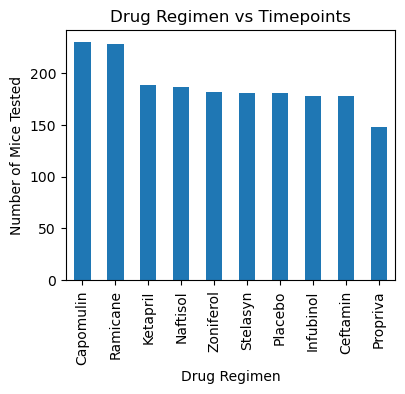

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

Bar_chart= clean_data['Drug Regimen'].value_counts()


chart= Bar_chart.plot(kind= "bar", title= 'Drug Regimen vs Timepoints', xlabel= 'Drug Regimen',ylabel= 'Number of Mice Tested', figsize=(4.25,3.25) )



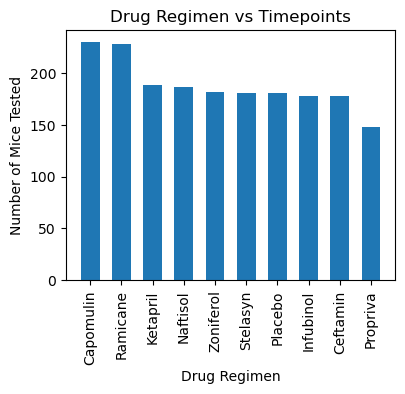

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#Bar_chart= clean_data['Drug Regimen'].value_counts()

plt.figure(figsize=(4.25,3.25))
plt.bar(Bar_chart.index, Bar_chart.values, width = 0.6)
plt.title('Drug Regimen vs Timepoints')
plt.xlabel('Drug Regimen')  
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)

plt.show()








Text(0.5, 1.0, 'Distribution of Female vs Male Mice')

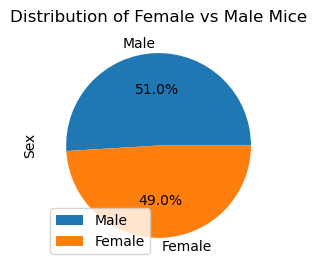

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_count = clean_data['Sex'].value_counts()

pieplot = gender_count.plot(kind='pie',autopct='%.1f%%',figsize=(3,3),startangle=360)
pieplot.legend(['Male','Female'],loc='best')
pieplot.set_title('Distribution of Female vs Male Mice')




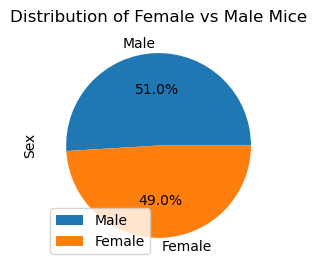

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.figure(figsize=(3,3))
plt.pie(gender_count, labels= ['Male','Female'], autopct='%.1f%%', startangle=360)
plt.ylabel('Sex')
plt.legend(['Male','Female'],loc='best')
plt.title('Distribution of Female vs Male Mice')

plt.show()



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = merged_data_complete.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint = max_timepoint.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


merged_data = max_timepoint.merge(merged_data_complete, how='left', on=['Mouse ID', 'Timepoint'])
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol= merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_vol)
    
    # add subset 
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq= Q1 = quartiles[0.25]
    upperq= Q3 = quartiles[0.75]
    IQR = upperq-lowerq
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{treatment}'s potential outliers:",outliers)

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


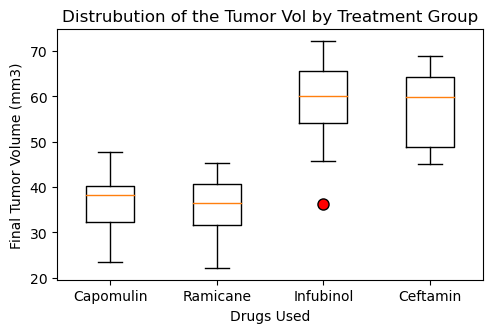

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots(figsize=(5.5, 3.25))
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')
ax1.set_title('Distrubution of the Tumor Vol by Treatment Group')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drugs Used')
ax1.boxplot(tumor_vol_data, labels=treatments,flierprops=flierprops)
plt.show()


## Line and Scatter Plots

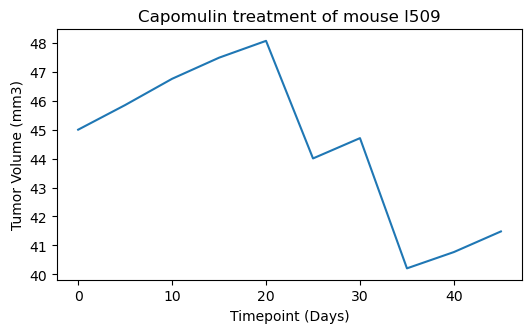

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_id = "l509"
mouse_data = clean_data[(clean_data["Mouse ID"] == mouse_id) & 
                               (clean_data["Drug Regimen"] == "Capomulin")]
plt.figure(figsize=(6,3.25))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

plt.title('Capomulin treatment of mouse l509')
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



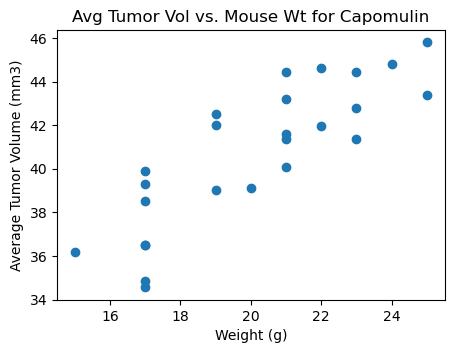

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
mouse_stats = capomulin_data.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"})

fig2, ax2 = plt.subplots(figsize=(5,3.5))

ax2.scatter(mouse_stats["Weight (g)"], mouse_stats["Tumor Volume (mm3)"])
ax2.set_xlabel("Weight (g)")
ax2.set_ylabel("Average Tumor Volume (mm3)")
ax2.set_title("Avg Tumor Vol vs. Mouse Wt for Capomulin")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.
Slope:  0.95
Intercept:  21.55
R-squared value:  0.71


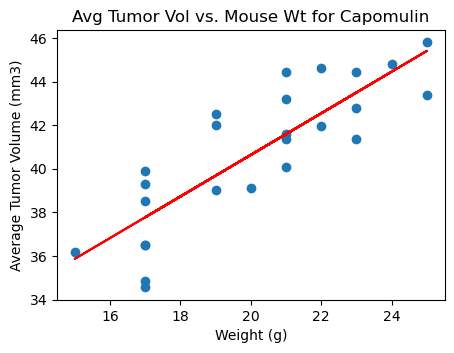

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_stats["Weight (g)"], mouse_stats["Tumor Volume (mm3)"])[0]
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_stats["Weight (g)"], mouse_stats["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation,2)}.")
fig3, ax3 = plt.subplots(figsize=(5,3.5))

ax3.scatter(mouse_stats["Weight (g)"], mouse_stats["Tumor Volume (mm3)"])
ax3.set_xlabel("Weight (g)")
ax3.set_ylabel("Average Tumor Volume (mm3)")
ax3.set_title("Avg Tumor Vol vs. Mouse Wt for Capomulin")
ax3.plot(mouse_stats["Weight (g)"], slope*mouse_stats["Weight (g)"] + intercept, color='red')
print("Slope: ", round(slope,2))
print("Intercept: ", round(intercept,2))
print("R-squared value: ",round(r_value**2,2))
